In [ ]:
!pip install koreanize-matplotlib
!pip install pandas matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import seaborn as sns
from collections import Counter

In [ ]:
product_list = pd.read_csv("/content/29cm_list_add_rank.csv")
review_list = pd.read_csv("/content/29cm_reviews.csv")

#기초기술통계

In [ ]:
# DataFrame 기술 통계 출력 (소수점 0자리로 제한)
pd.options.display.float_format = '{:.0f}'.format

# 이름길이 대신 단어 개수로 계산
product_list['단어개수'] = product_list['아이템이름'].apply(lambda x: len(x.split()))


In [ ]:
product_list.info()
product_list.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    500 non-null    int64 
 1   아이템넘버   500 non-null    int64 
 2   아이템이름   500 non-null    object
 3   아이템브랜드  500 non-null    object
 4   정가      500 non-null    int64 
 5   세일%     500 non-null    int64 
 6   세일가     500 non-null    int64 
 7   좋아요수    500 non-null    int64 
 8   리뷰수     500 non-null    int64 
 9   단어개수    500 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 39.2+ KB


,rank,아이템넘버,정가,세일%,세일가,좋아요수,리뷰수,단어개수
count,500,500,500,500,500,500,500,500
mean,250,2079231,75598,25,57266,2126,183,6
std,144,575461,40722,18,35163,3766,307,2
min,1,343379,9900,0,8910,76,33,1
25%,126,1792286,48000,10,30780,551,52,5
50%,250,2160805,69000,24,52232,968,80,6
75%,375,2553808,95625,34,72960,2004,164,7
max,500,2960399,236000,82,196000,42486,3208,14


In [ ]:
review_list.info()
review_list.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이템넘버   5000 non-null   int64 
 1   리뷰번호    5000 non-null   int64 
 2   리뷰내용    5000 non-null   object
 3   리뷰평점    5000 non-null   int64 
 4   작성자     5000 non-null   object
 5   작성일     5000 non-null   object
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


,아이템넘버,리뷰번호,리뷰평점
count,5000,5000,5000
mean,1880300,10271715,5
std,693651,1750037,0
min,555363,3860088,1
25%,1007340,10249842,5
50%,2156572,10728077,5
75%,2459717,11394939,5
max,2799427,11830585,5


분석 목적: 파자마 관련 인기/필수 키워드 도출

분석 방법: 아이템이름의 단어, 키워드의 빈도수 시각화를 통해 판매량과 밀접한 관련이 있는 리뷰수, 좋아요수, RANK와 비교 분석

In [ ]:
def eda_boxplot_histogram(data, col1):
    """
    EDA 시각화 함수. 데이터프레임과 시각화할 두 개의 컬럼 이름을 받아 적합한 그래프를 생성.

    Parameters:
        data (DataFrame): 분석에 사용할 데이터프레임
        col1 (str): 산점도의 x축으로 사용할 컬럼 이름
        col2 (str): 산점도의 y축으로 사용할 컬럼| 이름
    """
    if col1 not in data.columns not in data.columns:
        print("The specified columns are not in the dataframe.")
        return

    # 단일 컬럼 박스플롯
    def plot_boxplot(column):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, y=column)
        plt.title(f'{column} Boxplot')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

    # 단일 컬럼 히스토그램
    def plot_histogram(column):
        plt.figure(figsize=(10, 6))
        if data[column].dtype != 'object':
            sns.histplot(data[column], bins=30, kde=True)
            plt.title(f'{column} Histogram')
            plt.xlabel(column)
            plt.ylabel('Count')
        else:
            print(f"Cannot generate a histogram for non-numeric column: {column}")
        plt.tight_layout()
        plt.show()

    # 시각화 실행
    plot_boxplot(col1)
    plot_histogram(col1)


In [ ]:
def eda_scatter(data, col1, col2):
    """
    EDA 시각화 함수. 데이터프레임과 시각화할 두 개의 컬럼 이름을 받아 적합한 그래프를 생성.

    Parameters:
        data (DataFrame): 분석에 사용할 데이터프레임
        col1 (str): 산점도의 x축으로 사용할 컬럼 이름
        col2 (str): 산점도의 y축으로 사용할 컬럼 이름
    """
    if col1 not in data.columns or col2 not in data.columns:
        print("The specified columns are not in the dataframe.")
        return

    # 산점도 + 추세선
    def plot_scatter_with_trendline(x_column, y_column):
        plt.figure(figsize=(10, 6))
        if data[x_column].dtype != 'object' and data[y_column].dtype != 'object':
            sns.regplot(data=data, x=x_column, y=y_column, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
            plt.title(f'{x_column} vs {y_column} Scatter Plot with Trendline')
            plt.xlabel(x_column)
            plt.ylabel(y_column)
        else:
            print(f"Cannot generate a scatter plot with trendline for non-numeric columns: {x_column} or {y_column}")
        plt.tight_layout()
        plt.show()

    # 시각화 실행
    plot_scatter_with_trendline(col1, col2)


In [ ]:

import re

def analyze_keywords(data, col_name, compare_col):
    """
    데이터프레임에서 모든 키워드의 등장 빈도를 계산하고,
    각 키워드가 아이템 이름에서 몇 번 등장했는지 확인하며,
    두 번째 컬럼과의 산점도를 시각화하는 함수.

    Parameters:
        data (DataFrame): 분석에 사용할 데이터프레임
        col_name (str): 키워드를 분석할 텍스트 컬럼 이름
        compare_col (str): 비교할 두 번째 컬럼 이름

    Returns:
        DataFrame: 모든 키워드 및 각 키워드의 빈도 통계
    """
    if col_name not in data.columns or compare_col not in data.columns:
        print("The specified column(s) do not exist in the dataframe.")
        return None

    # 1. 특수문자 제거 및 모든 텍스트를 공백 기준으로 나누기
    data[col_name] = data[col_name].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # 특수문자 제거
    all_words = data[col_name].str.split().sum()  # 모든 텍스트를 단어 리스트로 만듦
    keyword_counts = Counter(all_words)  # 단어 등장 횟수 계산

    # 2. 각 키워드가 등장한 아이템 이름의 개수 계산
    def keyword_in_items(keyword):
        return data[col_name].apply(lambda x: keyword in x).sum()

    keyword_item_counts = {keyword: keyword_in_items(keyword) for keyword in keyword_counts.keys()}

    # 결과 데이터프레임 생성
    result = pd.DataFrame(list(keyword_counts.items()), columns=["키워드", "전체 빈도"])
    result["아이템 이름에서 등장한 수"] = result["키워드"].map(keyword_item_counts)

    # 히스토그램 그리기
    plt.figure(figsize=(12, 8))
    sns.barplot(x="키워드", y="전체 빈도", data=result.sort_values(by="전체 빈도", ascending=False).head(20), palette="viridis")
    plt.title("모든 키워드의 빈도수 히스토그램 (상위 20개)")
    plt.xlabel("키워드")
    plt.ylabel("빈도수")
    plt.xticks(rotation=45)
    plt.show()

    # 키워드 빈도수와 비교 컬럼 데이터 준비
    compare_data = pd.DataFrame({
        "키워드": result["키워드"],
        "키워드 빈도": result["전체 빈도"],
        compare_col: data[compare_col].iloc[:len(result)]
    })

    # 산점도
    plt.figure(figsize=(6, 6))
    scatter = sns.scatterplot(x="키워드 빈도", y=compare_col, data=compare_data)
    plt.title("키워드 빈도와 비교 컬럼 산점도")
    plt.xlabel("키워드 빈도")
    plt.ylabel(compare_col)

    # 이상치 레이블 표시
    for i in range(len(compare_data)):
        if compare_data[compare_col].iloc[i] > compare_data[compare_col].quantile(0.95):  # 상위 5% 이상치 기준
            plt.text(
                compare_data["키워드 빈도"].iloc[i],
                compare_data[compare_col].iloc[i],
                compare_data["키워드"].iloc[i],
                fontsize=9, color="red"
            )

    plt.show()

    return result


단어로 워 워드클라우드

단어개수의 박스플롯과 히스토그램을 그렸으나 유의미한 인사이트는 없었음

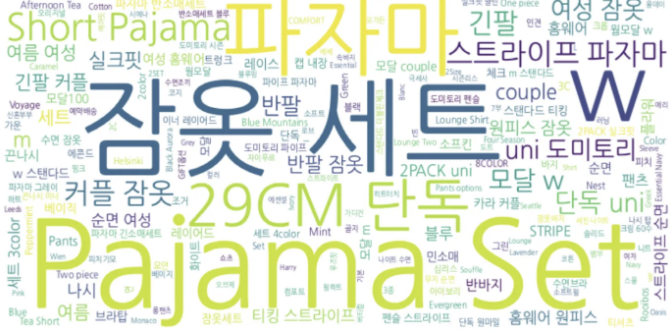

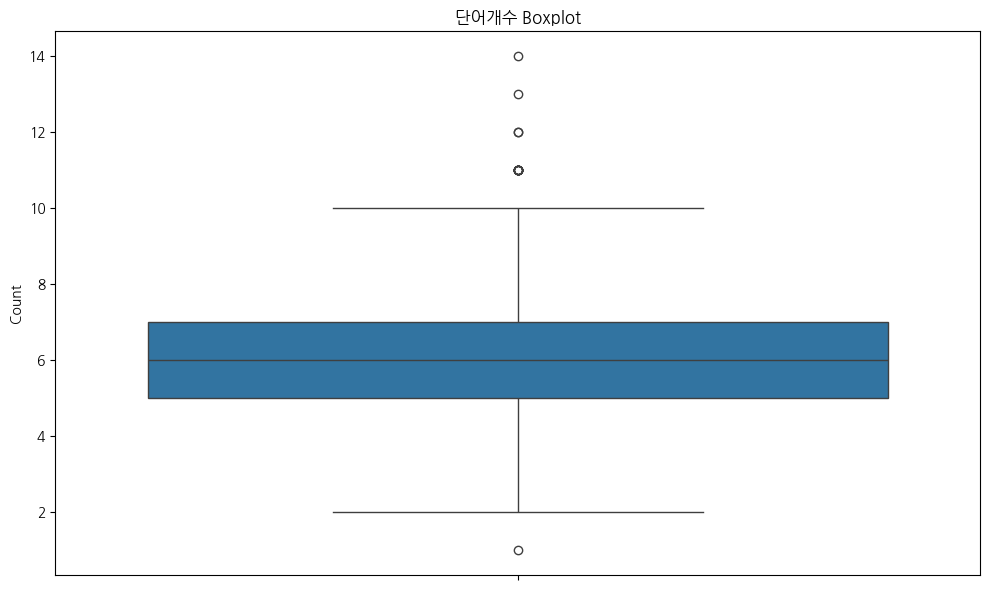

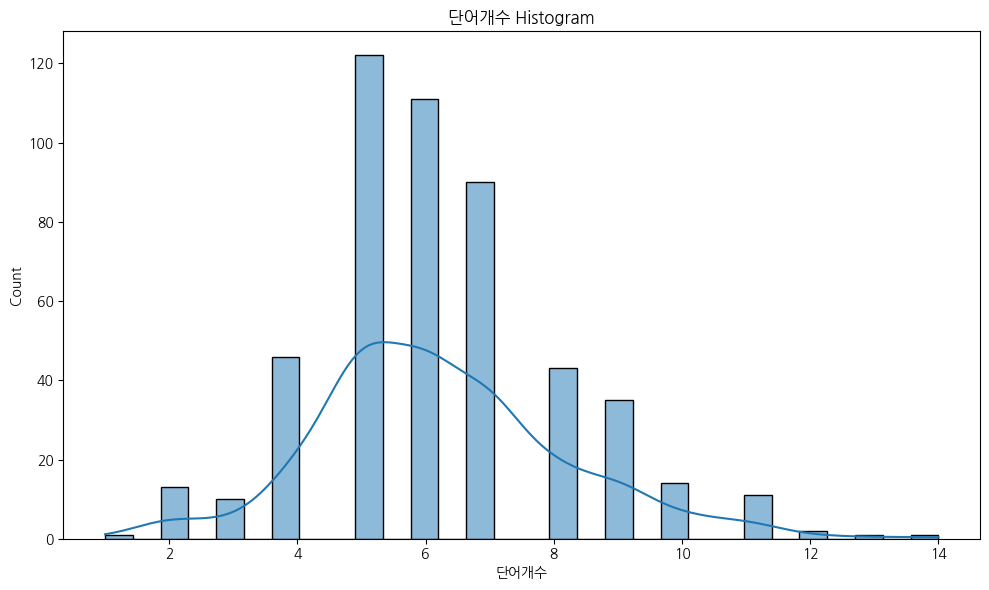

In [ ]:
eda_boxplot_histogram(product_list, "단어개수")

# 단어개수와 리뷰수, RANK, 좋아요수의 산점도 및 추세선

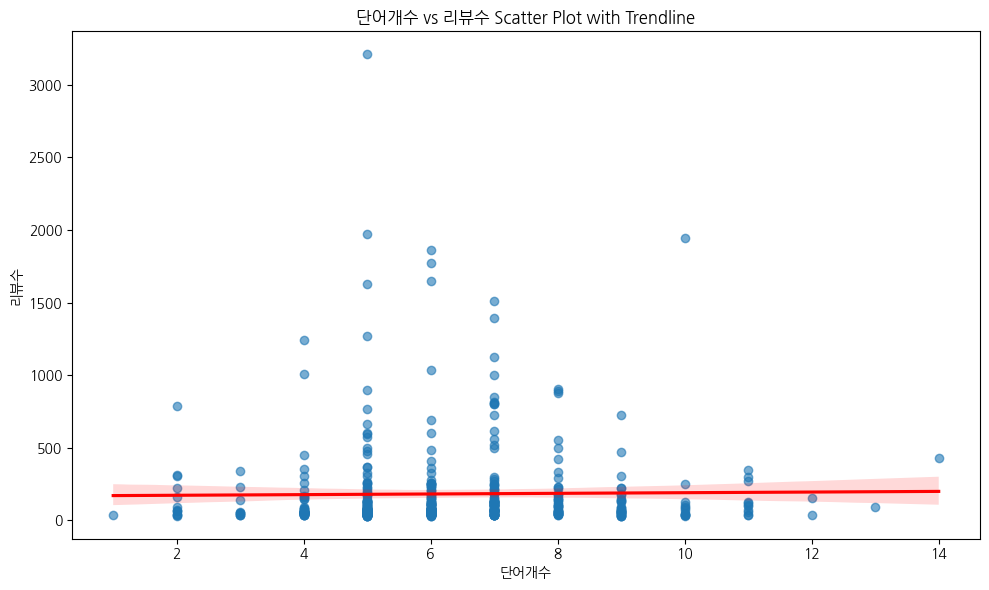

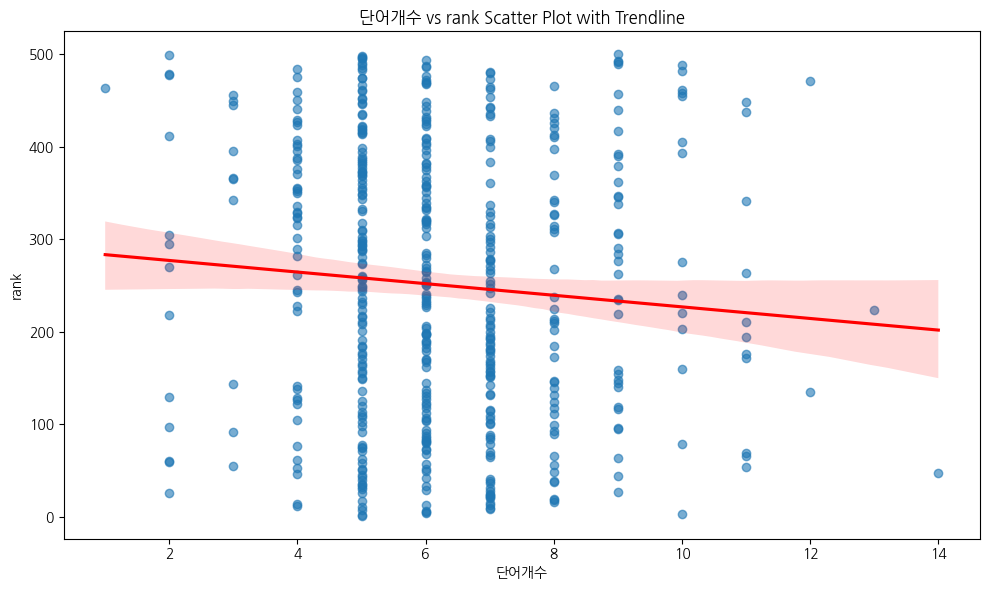

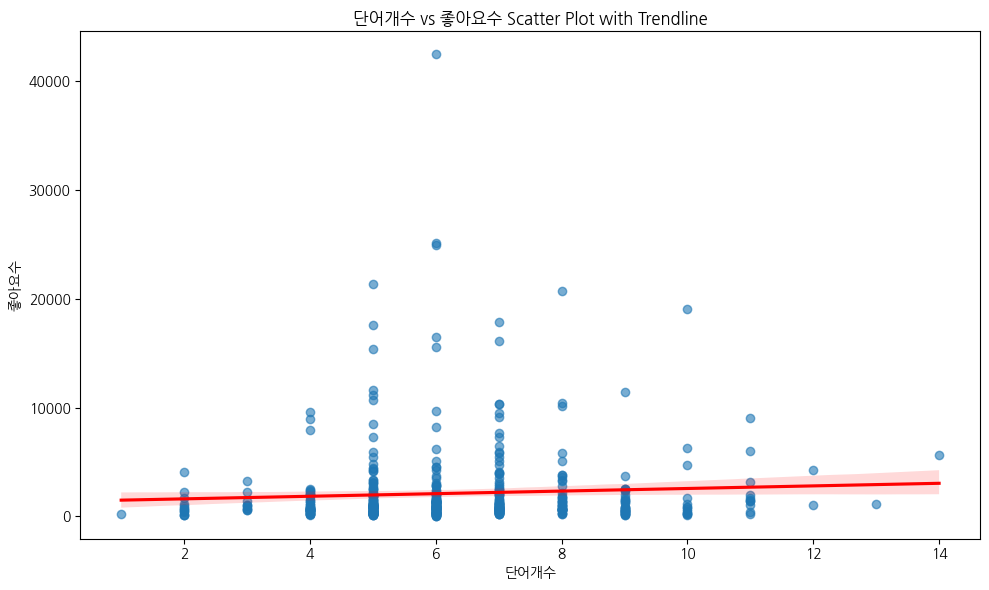

In [ ]:
eda_scatter(product_list, "단어개수", "리뷰수")
eda_scatter(product_list, "단어개수", "rank")
eda_scatter(product_list, "단어개수", "좋아요수")

# 빈도수 높은 단어 히스토그램
# 키워드 빈도와 리뷰수를 비교하여 이상치 20개 데이터레이블 표시

<ipython-input-122-b7fdc80604c2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="키워드", y="전체 빈도", data=result.sort_values(by="전체 빈도", ascending=False).head(20), palette="viridis")


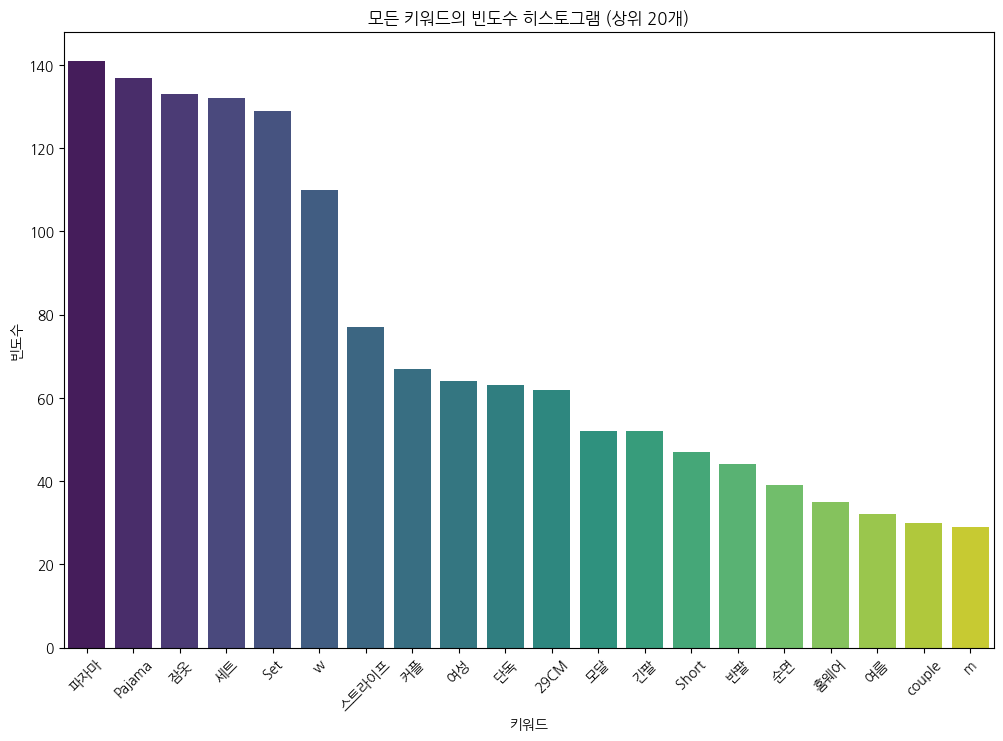

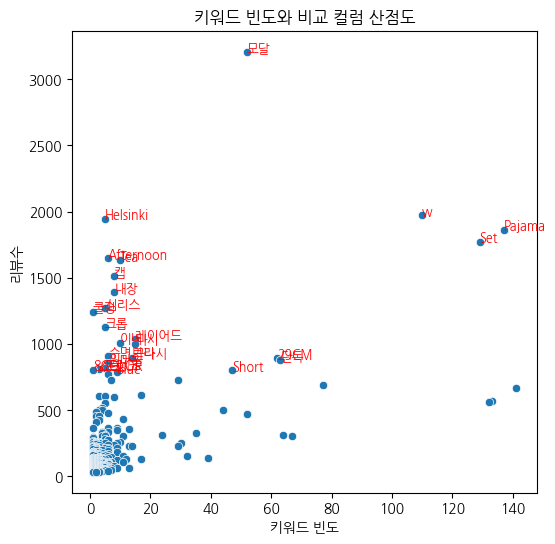

,키워드,전체 빈도,아이템 이름에서 등장한 수
0,모달,52,81
1,w,110,133
2,Helsinki,5,5
3,Pajama,137,142
4,Set,129,130
...,...,...,...
692,STREET,1,1
693,모티프,1,1
694,자카드,1,2
695,풀오버,1,1


In [ ]:
analyze_keywords(product_list, "아이템이름", "리뷰수")

# 이를 통해 아이템이름과 관련하여 다음의 인사이트를 얻어낼 수 있었음.
  > 모달 소재가 현재 가장 인기있고 검색되는 키워드 (약 10%의 상품명에서 조회됨)
  > 어느정도 인지도가 있는 브랜드들은 자신의 브랜드명을 상품명에 넣는 경향